In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
from tkinter import *
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


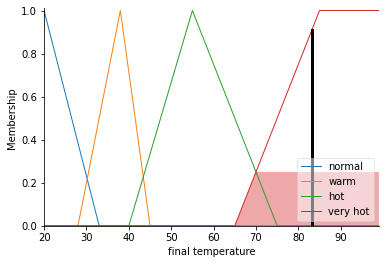

Final water Temperature is 83.2169312169312


c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


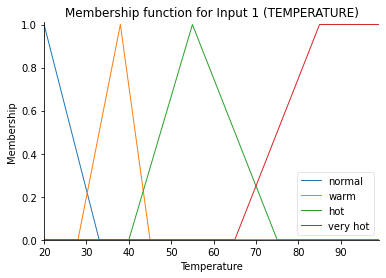

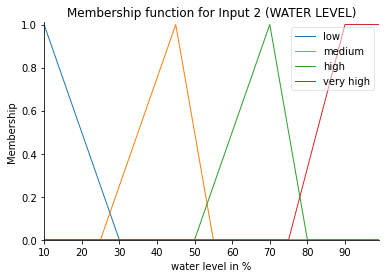

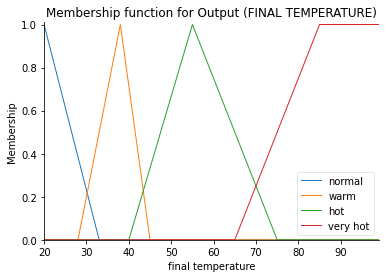

In [4]:

class MainWindow:

    def __init__(self, master):
        self.master = master
        self.master.geometry("1050x650+0+0")
        self.master.title("Water Bath Temperature Controler")
        self.master.config(bg="#009FBF")

        f = Frame(self.master, height=1080, width=1720, bg="pink", relief="ridge", bd=20)
        f.propagate(0)
        f.pack()

        self.mainTitle = Label(f, text="Water Bath Temperature Control System", fg="black" ,bg="pink", font=("MS Serif", 30, "bold italic")).place(
            x=200,y=50)
        self.temp = Label(f, text="Enter Temperature between 20°-100°C", fg="black", bg="pink",font=("Times New Roman", 14)).place(
            x=200,y=120)
        self.level = Label(f, text="Enter water level between 10-100 %", bg="pink",font=("Times New Roman", 14)).place(
            x=200,y=170)
        self.results = Label(f, text=" Final temperature is ", bg="pink",font=("Times New Roman", 14)).place(
            x=200,y=350)
        self.ttemp = Entry(f, width=30)
        self.tlevel = Entry(f, width=30)
        self.result = Entry(f, width=30)
        self.ttemp.place(x=520,y=125)
        self.tlevel.place(x=520,y=175)
        self.result.place(x=520,y=355)
        
        self.calc = Button(f, text="CALCULATE FINAL""\n""TEMPERATURE", width=19, height=3, fg="RED", bg="lavender",
                           font=("Helvetica", 11, "bold italic"), command=self.calculation)
        self.grap = Button(f, text="Membership""\n""Function", width=19, height=3, fg="RED", bg="lavender",
                           font=("Helvetica", 11, "bold italic"), command=self.graph)
        self.calc.place(x=450, y=220)
        self.grap.place(x=450, y=420)
    def calculation(self):
        f1 = Frame(self.master, height=1080, width=1720, bg="pink", relief="ridge", bd=20)
        f1.propagate(0)
        f1.pack()
        
        self.Temp=ctrl.Antecedent(np.arange(20,100,1),'Temperature')
        self.Temp['normal']=fuzzy.trimf(self.Temp.universe,[20,20,33])
        self.Temp['warm']=fuzzy.trimf(self.Temp.universe,[28,38,45])
        self.Temp['hot']=fuzzy.trimf(self.Temp.universe,[40,55,75])
        self.Temp['very hot']=fuzzy.trapmf(self.Temp.universe,[65,85,100,100])
        
        self.level=ctrl.Antecedent(np.arange(10,100,1),'water level in %')
        self.level['low']=fuzzy.trimf(self.level.universe,[10,10,30])
        self.level['medium']=fuzzy.trimf(self.level.universe,[25,45,55])
        self.level['high']=fuzzy.trimf(self.level.universe,[50,70,80])
        self.level['very high']=fuzzy.trapmf(self.level.universe,[75,90,100,100])
        
        self.tempout=ctrl.Consequent(np.arange(20,100),'final temperature')
        self.tempout['normal']=fuzzy.trimf(self.tempout.universe,[20,20,33])
        self.tempout['warm']=fuzzy.trimf(self.tempout.universe,[28,38,45])
        self.tempout['hot']=fuzzy.trimf(self.tempout.universe,[40,55,75])
        self.tempout['very hot']=fuzzy.trapmf(self.tempout.universe,[65,85,100,100])
        
        rule1=ctrl.Rule(self.Temp['normal'] & self.level['low'], self.tempout['normal'])
        rule2=ctrl.Rule(self.Temp['normal'] & self.level['medium'], self.tempout['normal'])
        rule3=ctrl.Rule(self.Temp['normal'] & self.level['high'], self.tempout['normal'])
        rule4=ctrl.Rule(self.Temp['normal'] & self.level['very high'], self.tempout['normal'])
        rule5=ctrl.Rule(self.Temp['warm'] & self.level['low'], self.tempout['warm'])
        rule6=ctrl.Rule(self.Temp['warm'] & self.level['medium'], self.tempout['normal'])
        rule7=ctrl.Rule(self.Temp['warm'] & self.level['high'], self.tempout['normal'])
        rule8=ctrl.Rule(self.Temp['warm'] & self.level['very high'], self.tempout['normal'])
        rule9=ctrl.Rule(self.Temp['hot'] & self.level['low'], self.tempout['hot'])
        rule10=ctrl.Rule(self.Temp['hot'] & self.level['medium'], self.tempout['warm'])
        rule11=ctrl.Rule(self.Temp['hot'] & self.level['high'], self.tempout['normal'])
        rule12=ctrl.Rule(self.Temp['hot'] & self.level['very high'], self.tempout['normal'])
        rule13=ctrl.Rule(self.Temp['very hot'] & self.level['low'], self.tempout['very hot'])
        rule14=ctrl.Rule(self.Temp['very hot'] & self.level['medium'], self.tempout['hot'])
        rule15=ctrl.Rule(self.Temp['very hot'] & self.level['high'], self.tempout['warm'])
        rule16=ctrl.Rule(self.Temp['very hot'] & self.level['very high'], self.tempout['normal'])

        rule=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16]
        
        x=ctrl.ControlSystem(rule)
        y=ctrl.ControlSystemSimulation(x)
        
        y.input['Temperature']=int(self.ttemp.get())
        y.input['water level in %']=int(self.tlevel.get())
        y.compute()
        self.tempout.view(sim=y)
        plt.show()
        self.result.insert(0,y.output['final temperature'])
        print("Final water Temperature is",y.output['final temperature'])
        
    def graph(self): 
        self.Temp.view()
        plt.title("Membership function for Input 1 (TEMPERATURE)")
        self.level.view()
        plt.title("Membership function for Input 2 (WATER LEVEL)")
        self.tempout.view()
        plt.title("Membership function for Output (FINAL TEMPERATURE)")
        root.destroy()

root = Tk()
root.resizable(0, 0)
RegObj = MainWindow(root)
root.mainloop()